In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('AutoData.csv')

In [3]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Perform EDA on the data

In [4]:
# checking if there are any null values or not
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
df.shape

(205, 25)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
# checking and storing categorical features into seperate list
var_col = []
for i in df:
    if df[i].dtypes=='O':
        var_col.append(i)

In [8]:
# checking and storing numerical features into seperate list
num_col = []
for i in df:
    if df[i].dtypes!='O':
        num_col.append(i)

In [9]:
# here are all the categorical features
var_col

['make',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [10]:
# here are all the numerical features
num_col

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

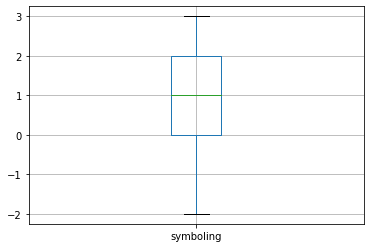

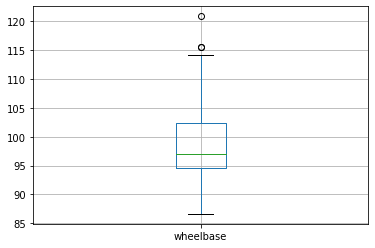

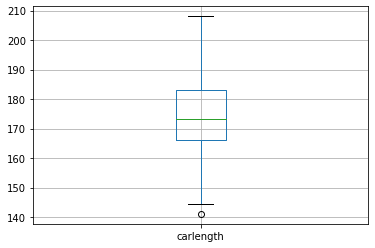

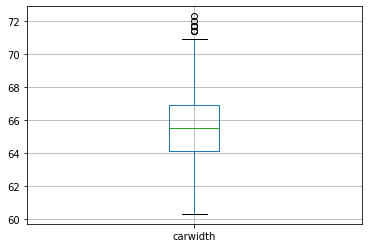

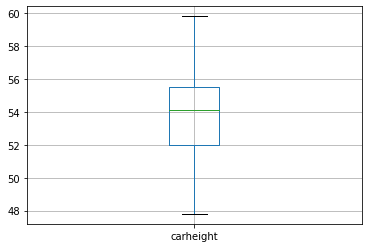

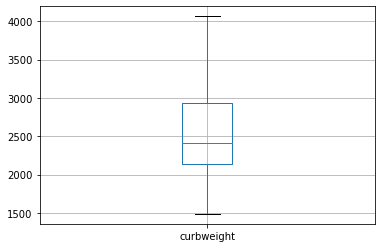

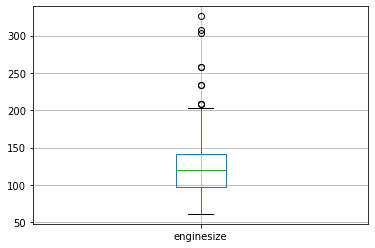

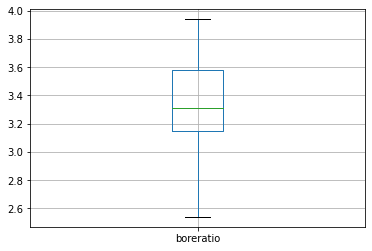

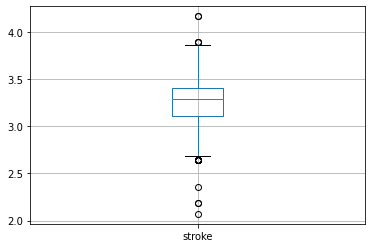

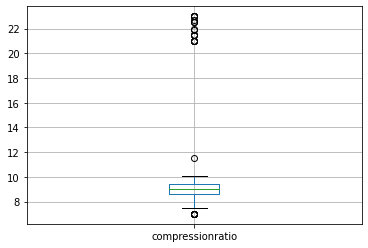

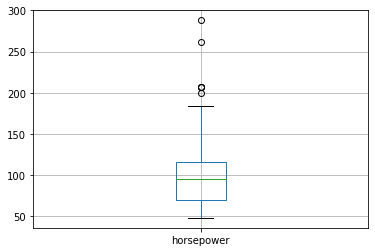

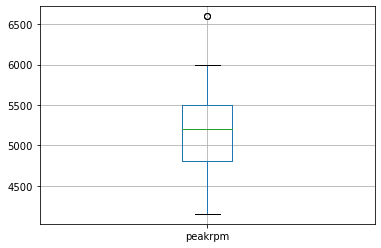

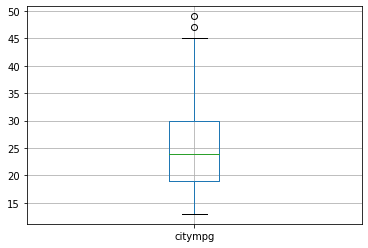

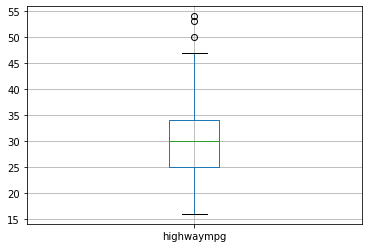

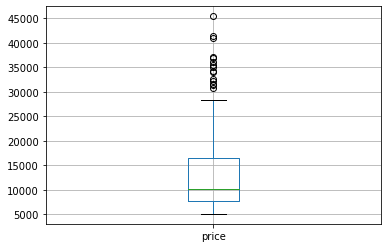

In [11]:
# finding the outliers of numerical columns
for i in num_col:
    df.boxplot(i)
    plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

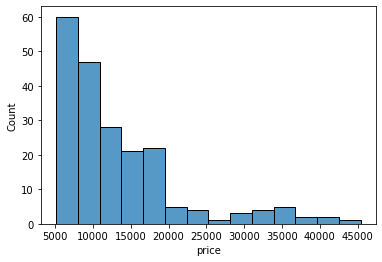

In [12]:
# checking the distribution of the price column
sns.histplot(df['price'])

In [13]:
# here we will create the new dataframe of the categorical and numerical features

dfvar= df.loc[:,var_col]

dfnum= df.loc[:,num_col]

In [14]:
dfvar

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [15]:
dfnum

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


- We have created new dataframes for the categorical and numerical features
- So, now we will check the unique values in the categorical features

In [16]:
dfvar.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [17]:
# checking the unique values of the categorical features
dfvar.nunique()

make              147
fueltype            2
aspiration          2
doornumber          2
carbody             5
drivewheel          3
enginelocation      2
enginetype          7
cylindernumber      7
fuelsystem          8
dtype: int64

In [18]:
dfvar['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

<AxesSubplot:>

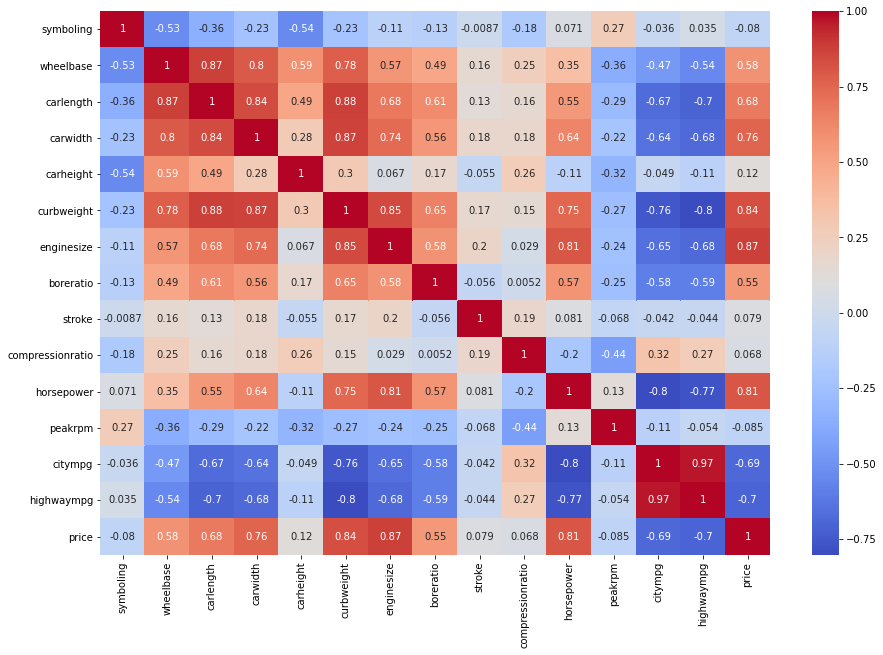

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')

In [20]:
dfvar.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [21]:
# here we will import LabelEncoder to convert categorical features into numerical features
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
dfnew = dfvar[var_col].apply(le.fit_transform)

In [24]:
# here you can see all the categorical features has converted into numerical features
dfnew

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,2,1,0,1,0,2,0,0,2,5
1,3,1,0,1,0,2,0,0,2,5
2,1,1,0,1,2,2,0,5,3,5
3,4,1,0,0,3,1,0,3,2,5
4,5,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5
201,138,1,1,0,3,2,0,3,2,5
202,140,1,0,0,3,2,0,5,3,5
203,142,0,1,0,3,2,0,3,3,3


In [25]:
dfmain = dfnew.join(dfnum)

In [26]:
dfmain

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,1,0,0,3,2,0,3,2,5,...,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,138,1,1,0,3,2,0,3,2,5,...,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,140,1,0,0,3,2,0,5,3,5,...,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,142,0,1,0,3,2,0,3,3,3,...,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


<AxesSubplot:>

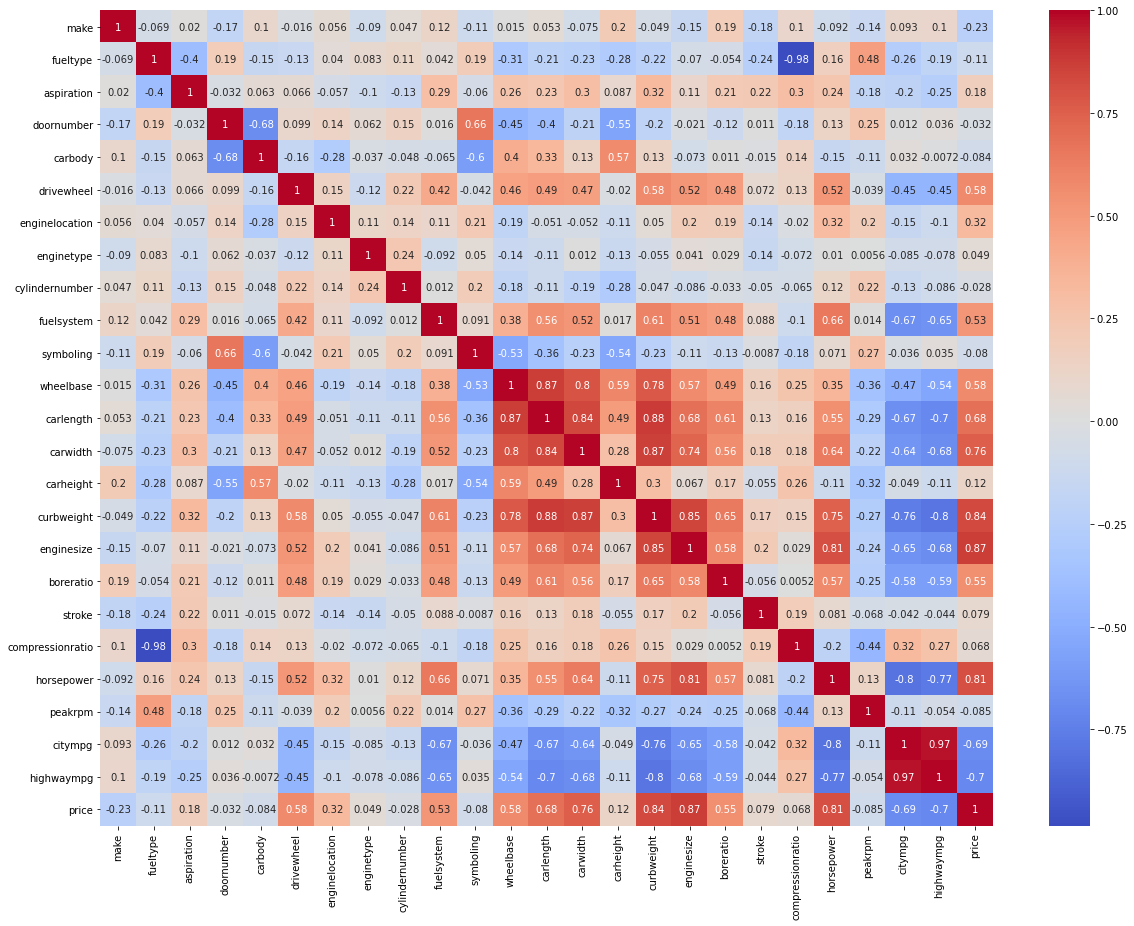

In [27]:
# here we will see the correlation between the independent and dependent features
plt.figure(figsize=(20,15))
sns.heatmap(dfmain.corr(), annot=True,cmap='coolwarm')

## Pick the best variable for making a simple linear regression model

In [28]:
dfmain.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,0,2,5,...,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,5,3,5,...,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,1,0,0,3,1,0,3,2,5,...,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,1,0,0,3,0,0,3,1,5,...,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [29]:
# creatign new variable where we will store independent and dependent features

X = dfmain.drop('price', axis=1)

y = dfmain['price']

In [30]:
X.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,5,3,5,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,1,0,0,3,1,0,3,2,5,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,1,0,0,3,0,0,3,1,5,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [31]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [32]:
from sklearn.ensemble import ExtraTreesRegressor

In [33]:
model = ExtraTreesRegressor()

In [34]:
model.fit(X, y)

ExtraTreesRegressor()

In [35]:
model.feature_importances_

array([0.01575981, 0.00268412, 0.01072819, 0.00277068, 0.00583129,
       0.07605925, 0.02368177, 0.0037288 , 0.01217798, 0.01477297,
       0.00279026, 0.01771236, 0.02309967, 0.07868993, 0.00551666,
       0.13696498, 0.27322714, 0.01448586, 0.00683275, 0.00535949,
       0.12253251, 0.01405795, 0.06712265, 0.06341296])

In [36]:
dfmain.columns

Index(['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

After using Extratreeregressor we got 3 important features which are 'curbweight','horsepower','enginesize'.

After getting this important features we will see the relation between independent column and dependent column.

{'whiskers': [<matplotlib.lines.Line2D at 0x217e1d56340>,
 'caps': [<matplotlib.lines.Line2D at 0x217e1d56a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x217e1d2b5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x217e1d63100>],
 'fliers': [<matplotlib.lines.Line2D at 0x217e1d63460>],
 'means': []}

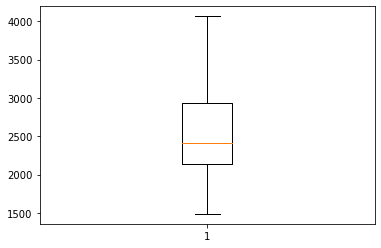

In [37]:
plt.boxplot(df['curbweight'])

# enginesize and horsepower has outliers we remove that

{'whiskers': [<matplotlib.lines.Line2D at 0x217e1d8ce80>,
 'caps': [<matplotlib.lines.Line2D at 0x217e23fc580>,
 'boxes': [<matplotlib.lines.Line2D at 0x217e1d8cc10>],
 'medians': [<matplotlib.lines.Line2D at 0x217e23fcc40>],
 'fliers': [<matplotlib.lines.Line2D at 0x217e23fcfa0>],
 'means': []}

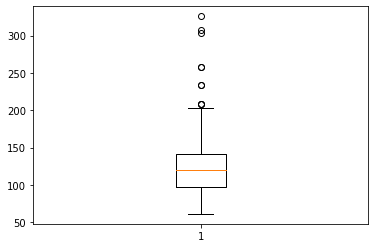

In [38]:
plt.boxplot(df['enginesize'])

In [39]:
dfmain[dfmain['enginesize']>200].index

Int64Index([15, 16, 17, 47, 48, 49, 71, 72, 73, 74, 129], dtype='int64')

In [40]:
dfmain.drop(index=dfmain[dfmain['enginesize']>200].index, inplace=True)

In [41]:
sum(dfmain['enginesize']>200)

0

{'whiskers': [<matplotlib.lines.Line2D at 0x217e1dd6c70>,
 'caps': [<matplotlib.lines.Line2D at 0x217e1de2370>,
 'boxes': [<matplotlib.lines.Line2D at 0x217e1dd6910>],
 'medians': [<matplotlib.lines.Line2D at 0x217e1de2a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x217e1de2d90>],
 'means': []}

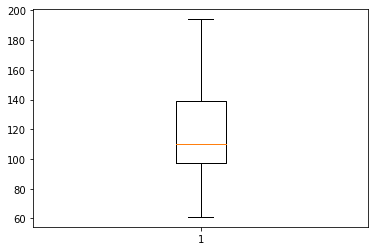

In [42]:
plt.boxplot(dfmain['enginesize'])

{'whiskers': [<matplotlib.lines.Line2D at 0x217e1e35af0>,
 'caps': [<matplotlib.lines.Line2D at 0x217e1e44190>,
 'boxes': [<matplotlib.lines.Line2D at 0x217e1e357f0>],
 'medians': [<matplotlib.lines.Line2D at 0x217e1e44850>],
 'fliers': [<matplotlib.lines.Line2D at 0x217e1e44bb0>],
 'means': []}

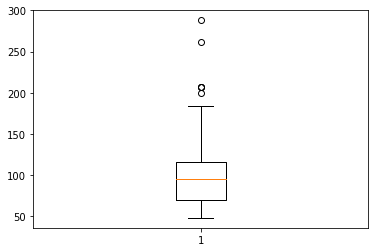

In [43]:
plt.boxplot(df['horsepower'])

In [44]:
dfmain.drop(index=dfmain[dfmain['horsepower']>160].index, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x217e1e8fdc0>,
 'caps': [<matplotlib.lines.Line2D at 0x217e1e9e4c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x217e1e8fac0>],
 'medians': [<matplotlib.lines.Line2D at 0x217e1e9eb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x217e1e9eee0>],
 'means': []}

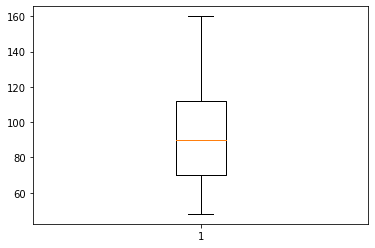

In [45]:
plt.boxplot(dfmain['horsepower'])

<AxesSubplot:xlabel='curbweight', ylabel='price'>

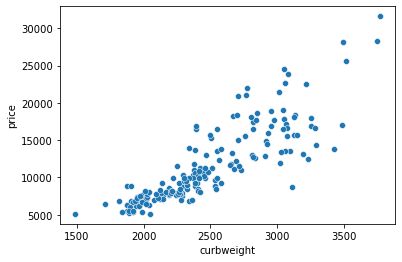

In [46]:
# checking relation of curbweight with the price column
sns.scatterplot(dfmain['curbweight'], dfmain['price'])

<AxesSubplot:xlabel='enginesize', ylabel='price'>

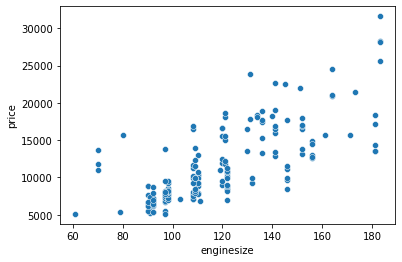

In [47]:
# checking relation of enginesize with the price column
sns.scatterplot(dfmain['enginesize'], dfmain['price'])

<AxesSubplot:xlabel='horsepower', ylabel='price'>

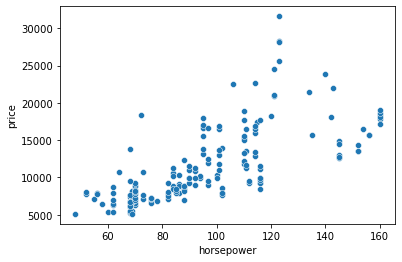

In [48]:
# checking relation of horsepower with the price column
sns.scatterplot(dfmain['horsepower'], dfmain['price'])

In [49]:
# importing LinearRegression to build a model on one independent and dependent feature
from sklearn.linear_model import LinearRegression

In [50]:
lr = LinearRegression()

In [51]:
# Now here, firstly we will take the first independent feature which is curbweight and dependent variabel price

X1 = dfmain.loc[:,['curbweight']]
y1 = dfmain.loc[:,['price']]

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train ,X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [54]:
model1 = lr.fit(X_train, y_train)

In [55]:
y_predict1 = lr.predict(X_test)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_test, y_predict1)

0.5955743334559882

In [58]:
# taking the second independent feature 
X2 = dfmain.loc[:,['enginesize']]
y2 = dfmain.loc[:,['price']]

In [59]:
X_train ,X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [60]:
model2 = lr.fit(X_train, y_train)

In [61]:
y_predict2 = lr.predict(X_test)

In [62]:
r2_score(y_test, y_predict2)

0.5845815012139735

In [63]:
# taking the third independent feature 
X3 = dfmain.loc[:,['horsepower']]
y3 = dfmain.loc[:,['price']]

In [64]:
X_train ,X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [65]:
model3 = lr.fit(X_train, y_train)

In [66]:
y_predict3 = lr.predict(X_test)

In [67]:
r2_score(y_test, y_predict3)

0.566247341618691

### Now, after getting the 3 models on one independent and one dependent feature now we will calculate the mean squared error and mean absolute error

In [68]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [69]:
# finding the mean squared error and mean absolute error for the first model
mse1 = mean_squared_error(y_test, y_predict1)
mae1 = mean_absolute_error(y_test, y_predict1)

In [70]:
print("Mean Squared Error For The First Model: ",mse1)
print("Mean Absolute Error For The First Model: ",mae1)

Mean Squared Error For The First Model:  6938913.709057874
Mean Absolute Error For The First Model:  1721.7115772078612


In [71]:
# finding the mean squared error and mean absolute error for the second model
mse2 = mean_squared_error(y_test, y_predict2)
mae2 = mean_absolute_error(y_test, y_predict2)

In [72]:
print("Mean Squared Error For The Second Model: ",mse2)
print("Mean Absolute Error For The Second Model: ",mae2)

Mean Squared Error For The Second Model:  7127522.693738098
Mean Absolute Error For The Second Model:  2005.5270511709462


In [73]:
# finding the mean squared error and mean absolute error for the third model
mse3 = mean_squared_error(y_test, y_predict3)
mae3 = mean_absolute_error(y_test, y_predict3)

In [74]:
print("Mean Squared Error For The Third Model: ",mse3)
print("Mean Absolute Error For The Third Model: ",mae3)

Mean Squared Error For The Third Model:  7442090.14551954
Mean Absolute Error For The Third Model:  2094.964846775807


- Now, as we have found out the MSE and MAE, now we will find out the MAPE Score or Value of all the three models and for that we will create a seperate function for that

In [75]:
def mape(y_test, y_predict):
    result = np.abs((y_test-y_predict)/y_test)*100
    print("MAPE Score is: ",np.mean(result))

In [76]:
mape(y_test, y_predict1)

MAPE Score is:  price    16.017469
dtype: float64


In [77]:
mape(y_test, y_predict2)

MAPE Score is:  price    19.507537
dtype: float64


In [78]:
mape(y_test, y_predict3)

MAPE Score is:  price    21.258812
dtype: float64


#### From the above MAPE score we can see that, the first model has got the lowest MAPE score so now we will select the first model

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [80]:
# here we will find the r2_score of the first model as we have selected the first model
r2_score = r2_score(y_test, y_predict1)

In [81]:
print("r2_score of the model is: ", r2_score)

r2_score of the model is:  0.5955743334559882


## Multiple Linear Regression

#### Here, as we have got the top 3 features above after performing feature selection so to perform Multiple Linear Regression we will use those three features which are 'curbweight', 'enginesize' and last feature is 'horsepower'

In [82]:
from sklearn.metrics import r2_score

In [83]:
# creating independent and dependent feature for multiple linear regression

X = dfmain.loc[:,['curbweight','enginesize','horsepower']]
y = dfmain.loc[:,['price']]

In [84]:
X.head()

,curbweight,enginesize,horsepower
0,2548,130,111
1,2548,130,111
2,2823,152,154
3,2337,109,102
4,2824,136,115


In [85]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
lr.fit(X_train, y_train)

LinearRegression()

In [88]:
y_predml = lr.predict(X_test)

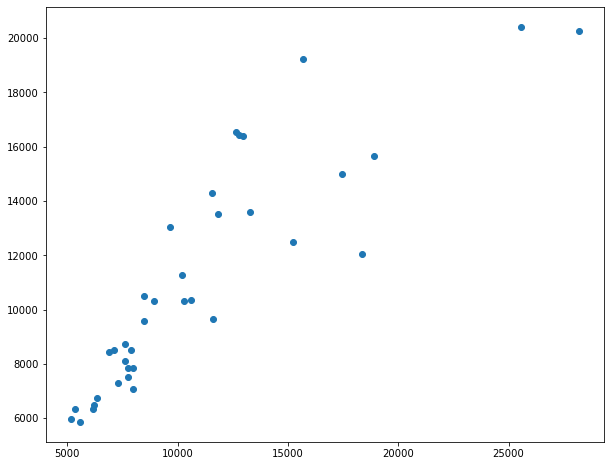

In [89]:
#here we will check the relation between testing data and predicted data using scatterplot

plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predml)
plt.show()

In [90]:
# here we will check the score of the MLR model
r2_score(y_test, y_predml)

0.7561572089387784

In [91]:
# now we will check the MAPE score of the model

mape(y_test, y_predml)

MAPE Score is:  price    14.497948
dtype: float64


## Multiple Linear Regression Using All Independent Features

In [92]:
from sklearn.metrics import r2_score

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
lrmodel = LinearRegression()

In [95]:
# creating independent and dependent feature for multiple linear regression

X = dfmain.drop('price', axis=1)
y = dfmain['price']

In [96]:
X.head()

,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,...,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,2,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,0,2,5,...,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,5,3,5,...,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,1,0,0,3,1,0,3,2,5,...,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,1,0,0,3,0,0,3,1,5,...,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [97]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [99]:
lrmodel.fit(X_train, y_train)

LinearRegression()

In [100]:
y_predmlall = lrmodel.predict(X_test)

In [101]:
r2_score(y_test, y_predmlall)

0.8328549109536485

In [102]:
# here we will use Cross Validation to check the score again using this technique

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X, y, cv=cv )



array([0.83285491, 0.73420513, 0.87386089, 0.79008604, 0.77012197])

# MLR using top 3 features

In [103]:
# creating dependent and independent features
x=dfmain.loc[:,['curbweight','enginesize','horsepower']]
y=dfmain.loc[:,['price']]

In [104]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [105]:
lr.fit(x_train,y_train)

LinearRegression()

In [106]:
y_predml=lr.predict(x_test)

In [107]:
r2_score(y_test,y_predml)

0.7561572089387784

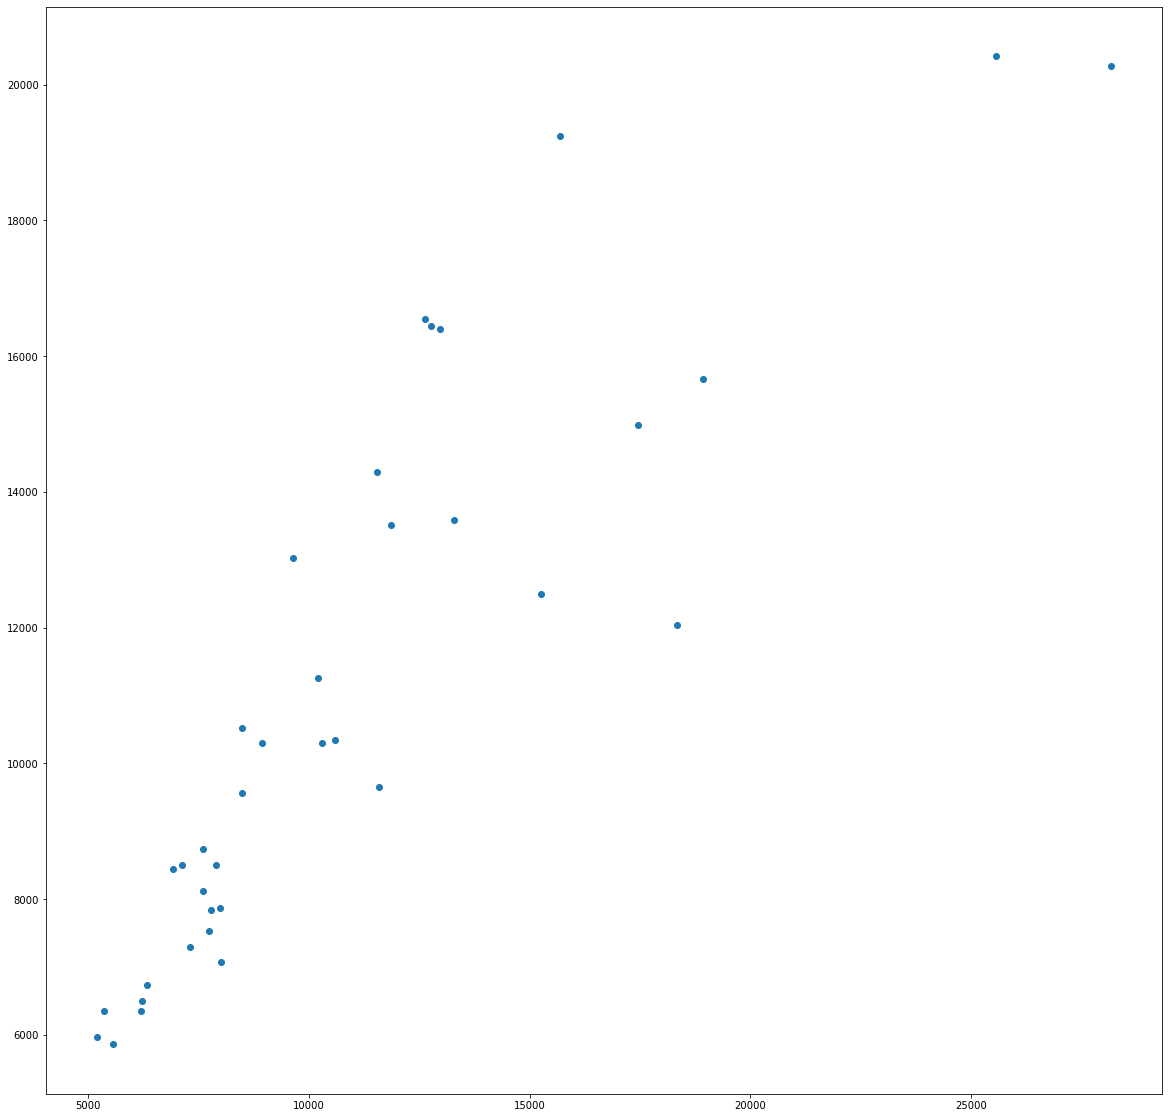

In [108]:
plt.figure(figsize=(20,20))
plt.scatter(y_test,y_predml)
plt.show()

After performing all features score is more than important 3 features